In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Note book for solving the Shallow water equation(SWE) Riemann problem exactly.

For SWE, all states $q$ that can be connected to some fixed state $h_{*}$ (representing either $h_l$ or $h_r$) can be determined by satisfying a system of two equations:
\begin{eqnarray}
s(h_{*}-h) &=& h_{*}u_{*} - hu\\
s(h_{*}u_{*} - hu) &=& h_{*}u_{*}^{2} - hu^{2} + \frac{1}{2} g (h_{*}^{2} - h^{2})
\end{eqnarray}

$(h_{*},u_{*})$ is fixed, and then we find all states (h,u) and the corresponding speeds satisfying the relations.  The two distinct families of solutions corresponding to 1-shock and 2-shock are obtained.


Given a Riemann problem with data $q_{l}$ and $q^{r}$, for a solution of two shocks. We solve Riemann problem to find a state $q_{m}$ that can be connected to $q_{l}$ by a 1-shock, since $q_{m}$ must lie on this curve, we have 
\begin{eqnarray}
u_{m} = u_{r} + (h_{m} -h_{r})\left(\frac{g}{2} \left( \frac{1}{h_{m}} + \frac{1}{h_{r}}\right)\right)^{\frac{1}{2}}
\label{s0}
\end{eqnarray}
And similary a state $q_{m}$ that can be connected to $q_{r}$ by a 2-shock, since $q_{m}$ must lie on this curve, we have 
\begin{eqnarray}
u_{m} = u_{l} - (h_{m} -h_{l})\left(\frac{g}{2} \left( \frac{1}{h_{m}} + \frac{1}{h_{l}}\right)\right)^{\frac{1}{2}}
\label{s1}
\end{eqnarray}

The intermediate state in the Riemann solution is obtained by solving the systems of two equations above using Newtons method.

# Newtons method

In [2]:
def newton(ho,uo,hl,hr,ul,ur,g,max_iter,epislon):
    
    def f1(hm,um):
        return (um - (ur + (hm-hr)*sqrt((g/2)*(1/hm + 1/hr))))

    def f2(hm,um):
        return (um - (ul - (hm-hl)*sqrt((g/2)*(1/hm + 1/hl))))

    #Derivatives
    def f1h(hm,um):
        return (sqrt(2*g*(hm + hr)/(hm*hr)))*(-2*hm*(hm + hr) + hr*(hm - hr)) \
              / (4*hm*(hm + hr))

    def f1u(hm,um):
        return 1

    def f2h(hm,um):
        return (sqrt(2*g*(hm + hl)/(hm*hl)))*(2*hm*(hm + hl) + hl*(hl - hm)) \
              / (4*hm*(hm + hl))

    def f2u(hm,um):
        return 1

    #Jacobian
    def J(f1h,f1u,f2h,f2u,hm,um):
        return array([[f1h(hm,um),f1u(hm,um)],[f2h(hm,um),f2u(hm,um)]])

    #inverse of J
    def Jinv(hm,um):
        return linalg.inv(J(f1h,f1u,f2h,f2u,hm,um))

    def f(hm,um):
        return array([f1(hm,um),f2(hm,um)])

    #intial value

    vo = array([ho,uo])

    #method
    for i in range(max_iter):

        v1 = vo - Jinv(ho,uo)@f(ho,uo)

        if linalg.norm(v1-vo) < epislon:
            break
        else:
            vo = v1
            ho = v1[0]
            uo = v1[1]
            
    return v1[0],v1[1]

### Example 13.6
Consider an initial height and  velocity field given by the equations below

\begin{equation*}
h(x,0) = \left\{\begin{array}{rr} 
1 & x < 0 \\
1 & x >= 0\\
\end{array}
\right.
\end{equation*}

\begin{equation*}
u(x,0) = \left\{\begin{array}{rr} 
0.5 & x < 0 \\
-0.5 & x >= 0\\
\end{array}
\right.
\end{equation*}

Set $g = 1$, find $h_{m}$ and $u_{m}$ and then plot the all-shock Riemann solution in the $h-hu$ plane.  


In [3]:
#initial uo and ho for the newton method
ho = 0.1
uo = 0.01

hl = 1
hr = 1
ul = 0.5
ur = -0.5
g=1

epislon = 1e-16
max_iter = 100

hm,um = newton(ho,uo,hl,hr,ul,ur,g,max_iter,epislon)

print("hm = ",hm)
print("um = ",um)

hm =  1.5513875245483204
um =  0.0


# Shock speed

In [4]:
def shockspeed(hstar,ustar,hm,um):
    s = (hstar*ustar - hm*um)/(hstar-hm)
    return s

### Dam break problem
Consider an initial height and  velocity field given by the equations below

\begin{equation*}
h(x,0) = \left\{\begin{array}{rr} 
2 & x < 0 \\
1 & x >= 0\\
\end{array}
\right.
\end{equation*}

\begin{equation*}
u(x,0) = \left\{\begin{array}{rr} 
0 & x < 0 \\
0 & x >= 0\\
\end{array}
\right.
\end{equation*}

Set $g = 1$, find $h_{m}$, $u_{m}$ and the shock speed.  


In [5]:
#initial uo and ho for the newton method
ho = 0.1
uo = 0.01

hl = 2
hr = 1
ul = 0
ur = 0
g=1

epislon = 1e-16
max_iter = 100

hm,um = newton(ho,uo,hl,hr,ul,ur,g,max_iter,epislon)

s = abs(shockspeed(hl,ul,hm,um))

print("hm = ",hm)
print("um = ",um)
print("shock speed = ",s)

hm =  1.4561642461359086
um =  0.41891871777793
shock speed =  1.1216887718966855


# All-Shock Riemann solution

In [6]:
def states(hl,ul,hr,ur,g,ah,bh,dh):

    umax = lambda h,hstar,ustar : ustar + sqrt((g/2)*(hstar/h - h/hstar)*(hstar-h))
    umin = lambda h,hstar,ustar : ustar - sqrt((g/2)*(hstar/h - h/hstar)*(hstar-h))

    h = arange(ah,bh,dh)

    ur1 = zeros(len(h))
    ur2 = zeros(len(h))
    ul1 = zeros(len(h))
    ul2 = zeros(len(h))

    for i in range(len(h)):
        #check for 2-shock or 2-rarefaction
        if h[i]<hr:
            ur1[i] = umin(h[i],hr,ur)
        else:
            ur2[i] = umax(h[i],hr,ur)
            
        #check for 1-shock or 1-rarefaction    
        if h[i]<hl:
            ul1[i] = umax(h[i],hl,ul)
        else:
            ul2[i] = umin(h[i],hl,ul)
            
    return h,ur1,ur2,ul1,ul2


In [7]:
def ql(hl,ul):
    hu = hl*ul
    return hl,hu

def qr(hr,ur):
    hu = hr*ur
    return hr,hu

def qm(hm,um):
    hu = hm*um
    return hm,hu

### Plot the all-shock Riemann solution in the $h-hu$ plane.  

In [8]:
#initial uo and ho for the newton method
ho = 0.1
uo = 0.01

hl = 1
hr = 1
ul = 0.5
ur = -0.5
g=1

epislon = 1e-16
max_iter = 100

ah = 1e-5
bh = 4.5
dh = 1e-4

In [9]:
#calling functions
h,ur1,ur2,ul1,ul2 = states(hl,ul,hr,ur,g,ah,bh,dh)

hm,um = newton(ho,uo,hl,hr,ul,ur,g,max_iter,epislon)

hl,hul = ql(hl,ul)
hr,hur = qr(hr,ur)
hm,hum = qm(hm,um)

#eliminating zero entries
ur1 = ur1[ur1!=0]
ur2 = ur2[ur2!=0]
ul1 = ul1[ul1!=0]
ul2 = ul2[ul2!=0]
nn = len(ur1)  

<IPython.core.display.Javascript object>


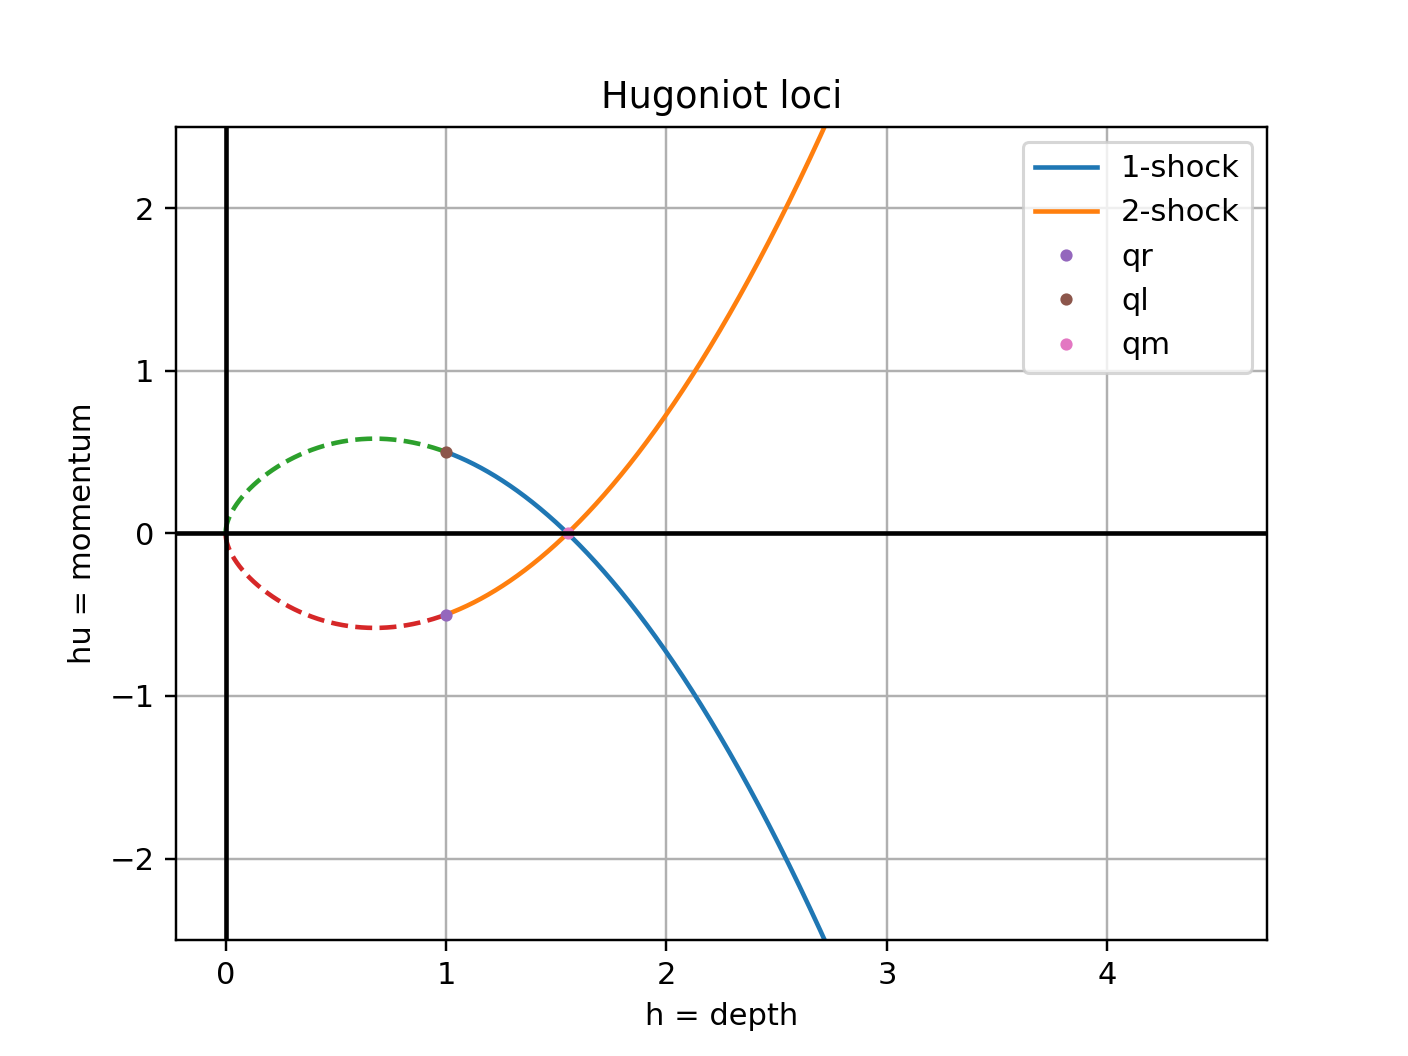

In [10]:
#plotting        
figure(1)
plot(h[nn:],h[nn:]*ul2,label='1-shock')
plot(h[nn:],h[nn:]*ur2,label='2-shock')
plot(h[0:nn],h[0:nn]*ul1,'--')
plot(h[0:nn],h[0:nn]*ur1,'--')

plot(hr,hur,'.',label='qr')
plot(hl,hul,'.',label='ql')
plot(hm,hum,'.',label='qm')

grid()
xlabel('h = depth')
ylabel('hu = momentum')
legend()
title('Hugoniot loci')
ylim(-2.5,2.5)

axhline(0, color='black')
axvline(0, color='black')

show()

 Dotted and solid curves represent unphysical and physical solutions respectively. 

### Example 13.7 (Dam break problem: Entropy-violating Riemann solution)

In [11]:
#initial uo and ho for the newton method
ho = 0.1
uo = 0.01

hl = 3
hr = 1
ul = 0
ur = 0
g=1

epislon = 1e-16
max_iter = 100

ah = 1e-5
bh = 4.5
dh = 1e-4

In [12]:
#calling functions
h,ur1,ur2,ul1,ul2 = states(hl,ul,hr,ur,g,ah,bh,dh)

hm,um = newton(ho,uo,hl,hr,ul,ur,g,max_iter,epislon)

hl,hul = ql(hl,ul)
hr,hur = qr(hr,ur)
hm,hum = qm(hm,um)

<IPython.core.display.Javascript object>


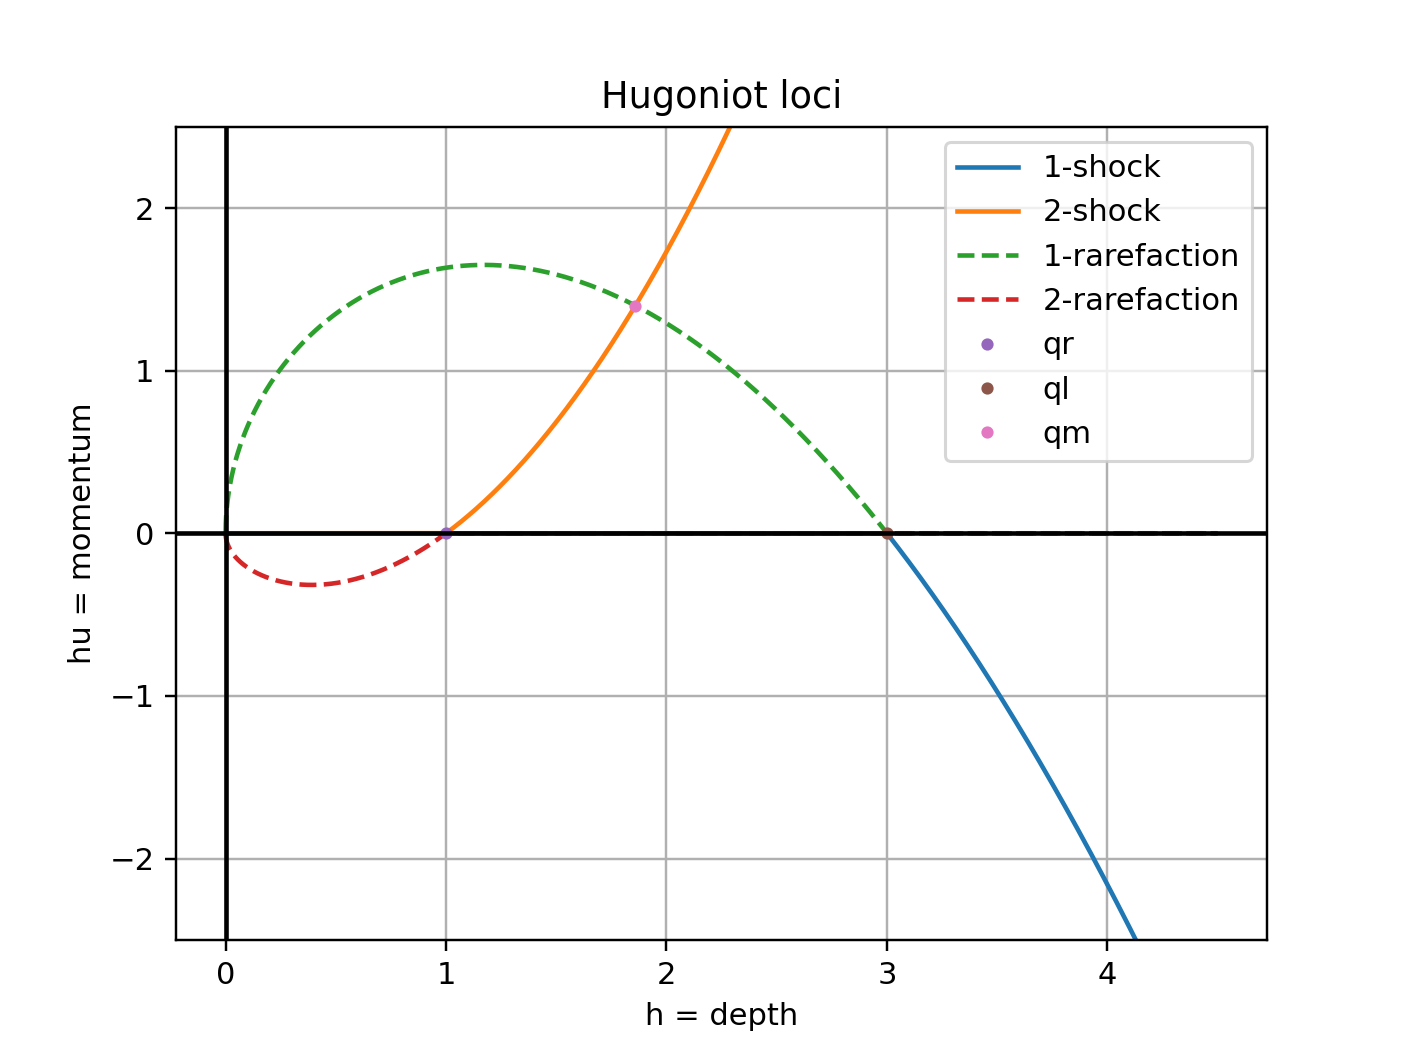

In [13]:
#plotting        
figure(2)
plot(h,h*ul2,label='1-shock')
plot(h,h*ur2,label='2-shock')
plot(h,h*ul1,'--',label='1-rarefaction')
plot(h,h*ur1,'--',label='2-rarefaction')

plot(hr,hur,'.',label='qr')
plot(hl,hul,'.',label='ql')
plot(hm,hum,'.',label='qm')

grid()
xlabel('h = depth')
ylabel('hu = momentum')
legend()
title('Hugoniot loci')
ylim(-2.5,2.5)

axhline(0, color='black')
axvline(0, color='black')

show()

### The All-rarefaction Riemann solution
The physical correct solution with a rarefaction wave is obtained by solving a system of two non linear equations for $h_{m}$ and $u_{m}$.
\begin{eqnarray}
u_{m} &=& u_{l} + 2(\sqrt{gh_{l}} - \sqrt{gh_{m}})\\
u_{m} &=& u_{r} - 2(\sqrt{gh_{r}} - \sqrt{gh_{m}})
\end{eqnarray}

Eliminating $u_{m}$ from both equations gives a single equation for $h_{m}$, that is explicitly solved to obtain:
\begin{equation}
h_{m} = \frac{1}{16g}[u_{l} - u_{r} + 2(\sqrt{gh_{l}} + \sqrt{gh_{r}})]^{2}
\end{equation}

In [14]:
def rare(hl,ul,hr,ur,g):
    hm = (1/16*g)*(ul - ur + 2*(sqrt(g*hl) + sqrt(g*hr)))**2
    um = ul + 2*(sqrt(g*hl) - sqrt(g*hm))
    return hm,um

### Example 13.5
Consider an initial height and  velocity field given by the equations below

\begin{equation*}
h(x,0) = \left\{\begin{array}{rr} 
1 & x < 0 \\
1 & x >= 0\\
\end{array}
\right.
\end{equation*}

\begin{equation*}
u(x,0) = \left\{\begin{array}{rr} 
-0.5 & x < 0 \\
0.5 & x >= 0\\
\end{array}
\right.
\end{equation*}

Set $g = 1$, find $h_{m}$ and $u_{m}$ and then plot the all-shock Riemann solution in the $h-hu$ plane.

In [15]:
#initial uo and ho for the newton method
ho = 0.1
uo = 0.01

hl = 1
hr = 1
ul = -0.5
ur = 0.5
g=1

ah = 1e-5
bh = 4.5
dh = 1e-4

In [16]:
#calling functions
h,ur1,ur2,ul1,ul2 = states(hl,ul,hr,ur,g,ah,bh,dh)

hm,um = rare(hl,ul,hr,ur,g)

hl,hul = ql(hl,ul)
hr,hur = qr(hr,ur)
hm,hum = qm(hm,um)

#eliminating zero entries
ur1 = ur1[ur1!=0]
ur2 = ur2[ur2!=0]
ul1 = ul1[ul1!=0]
ul2 = ul2[ul2!=0]
nn = len(ur1)  

<IPython.core.display.Javascript object>


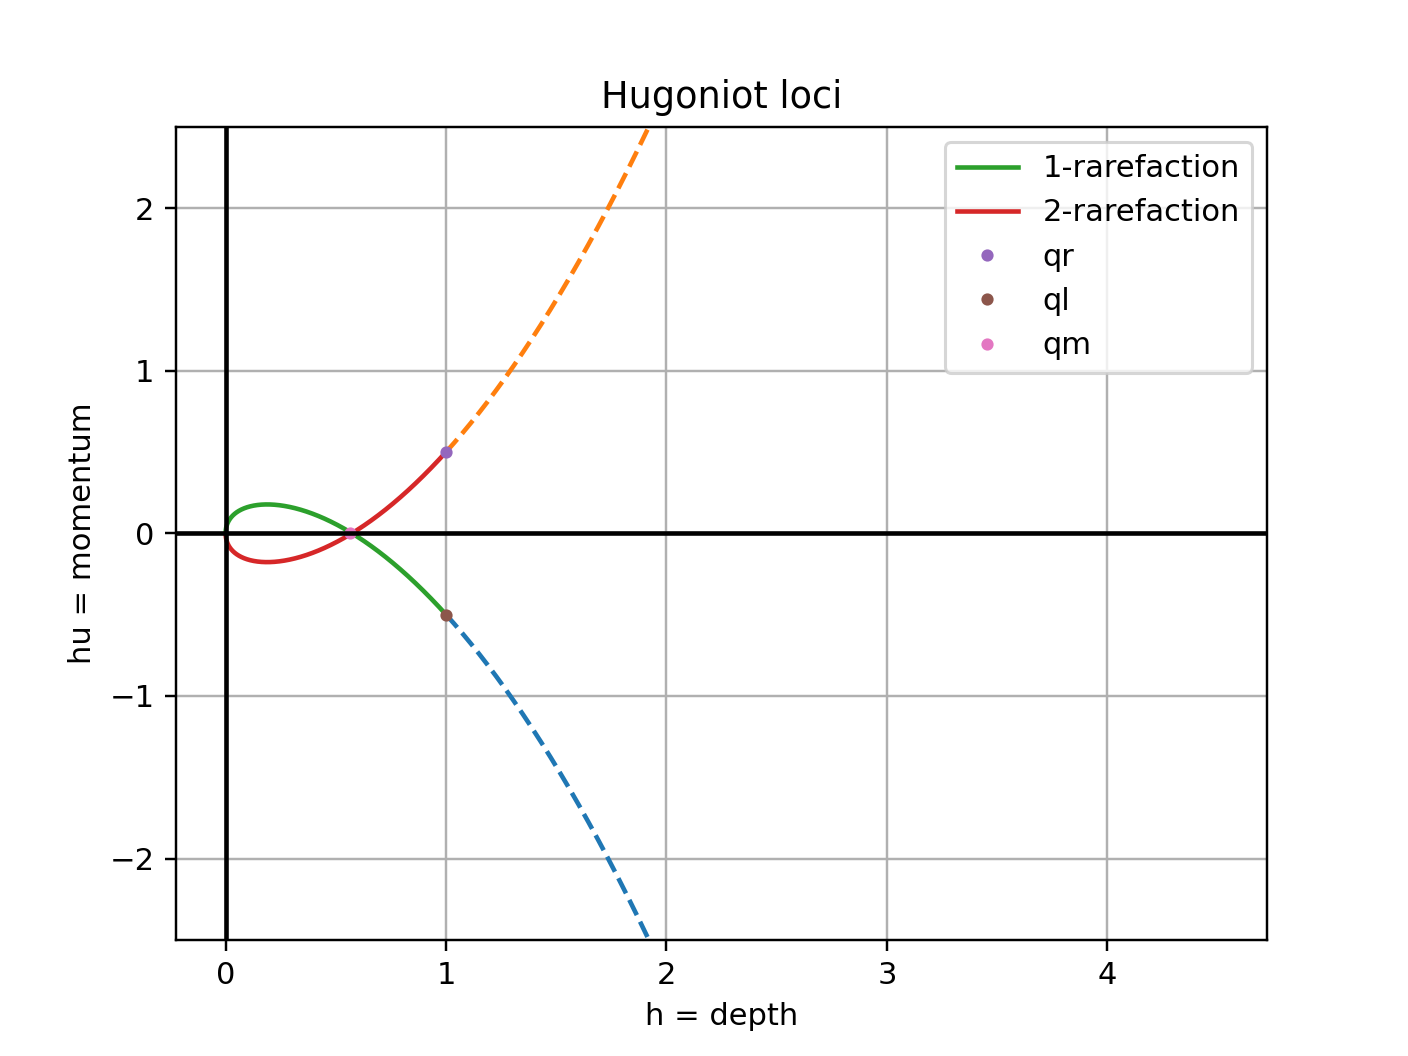

In [17]:
#plotting        
figure(3)
plot(h[nn:],h[nn:]*ul2,'--')
plot(h[nn:],h[nn:]*ur2,'--')
plot(h[0:nn],h[0:nn]*ul1,label='1-rarefaction')
plot(h[0:nn],h[0:nn]*ur1,label='2-rarefaction')

plot(hr,hur,'.',label='qr')
plot(hl,hul,'.',label='ql')
plot(hm,hum,'.',label='qm')

grid()
xlabel('h = depth')
ylabel('hu = momentum')
legend()
title('Hugoniot loci')
ylim(-2.5,2.5)

axhline(0, color='black')
axvline(0, color='black')

show()

# Dam break (all rare faction)

In [18]:
#initial uo and ho for the newton method
ho = 0.1
uo = 0.01

hl = 2
hr = 1
ul = 0
ur = 0
g=1

ah = 1e-5
bh = 4.5
dh = 1e-4

In [19]:
#calling functions
h,ur1,ur2,ul1,ul2 = states(hl,ul,hr,ur,g,ah,bh,dh)

hm,um = rare(hl,ul,hr,ur,g)

hl,hul = ql(hl,ul)
hr,hur = qr(hr,ur)
hm,hum = qm(hm,um)

print('hm = ',hm)
print('hum = ',hum)

hm =  1.4571067811865475
hum =  0.6035533905932742


<IPython.core.display.Javascript object>


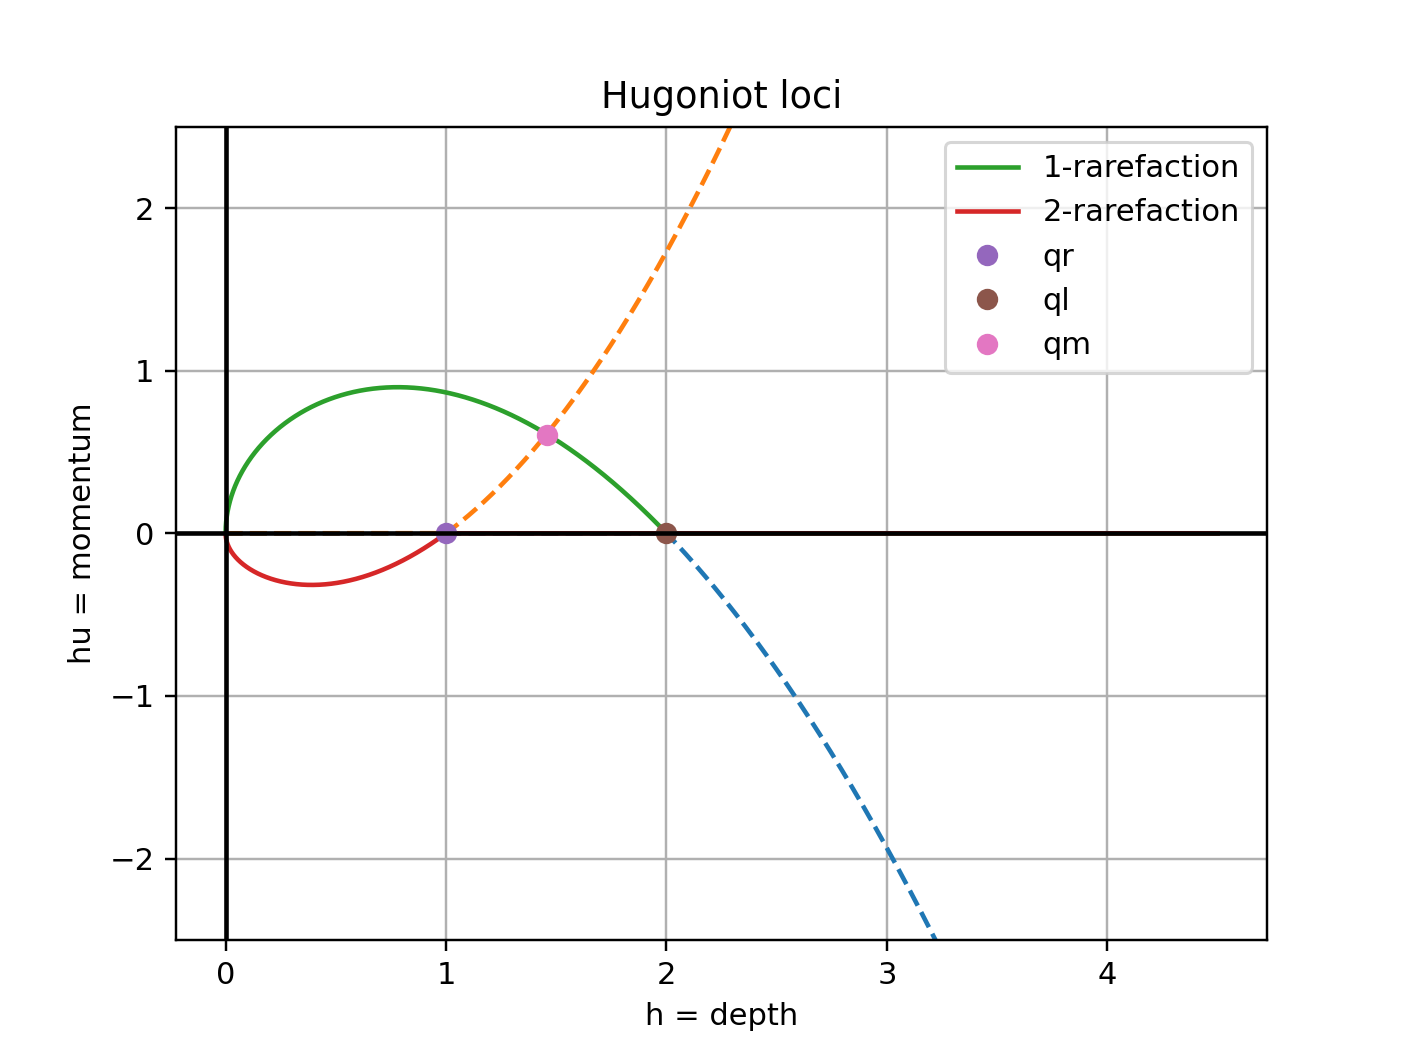

In [20]:
#plotting        
figure(4)
plot(h,h*ul2,'--')
plot(h,h*ur2,'--')
plot(h,h*ul1,label='1-rarefaction')
plot(h,h*ur1,label='2-rarefaction')

plot(hr,hur,'.',label='qr',markersize=12)
plot(hl,hul,'.',label='ql',markersize=12)
plot(hm,hum,'.',label='qm',markersize=12)

grid()
xlabel('h = depth')
ylabel('hu = momentum')
legend()
title('Hugoniot loci')
ylim(-2.5,2.5)

axhline(0, color='black')
axvline(0, color='black')

show()

In [21]:
def con_shock(q_o,q_l,q_r,g,max_iter,epislon):
    '''
    Description: determines whether these two states can be connected by either a 1-shock or a 2-shock.
    Input: states q_l and q_r
    Output: determined shock and its corresponding speed
    '''
    hl = q_l[0]
    hr = q_r[0]
    ho = q_o[0]
    
    hul = q_l[1]
    hur = q_r[1]
    uo = q_o[1]
    
    ul = hul/hl
    ur = hur/hr
    
    hm,um = newton(ho,uo,hl,hr,ul,ur,g,max_iter,epislon)
    hum = hm*um
    
    if hm>hl:
        sl = (hul - hum)/(hl-hm)
        return '1-shock'
    elif hm>hr:
        sr = (hur - hum)/(hr-hm)
        return '2-shock'
    
    

In [22]:
def con_rare(q_o,q_l,q_r,g,max_iter,epislon):
    '''
    Description: determines whether these two states can be connected by either a 1-shock or a 2-shock.
    Input: states q_l and q_r
    Output: determined shock and its corresponding speed
    '''
    hl = q_l[0]
    hr = q_r[0]
    ho = q_o[0]
    
    hul = q_l[1]
    hur = q_r[1]
    uo = q_o[1]
    
    ul = hul/hl
    ur = hur/hr
    
    hm,um = newton(ho,uo,hl,hr,ul,ur,g,max_iter,epislon)
    hum = hm*um
    
    if hm<hl and hm<hr:
        return 'all-rarefaction'
    elif hm<hl:
        sl = (hul - hum)/(hl-hm)
        return '1-rare'
    elif hm<hr:
        sr = (hur - hum)/(hr-hm)
        return '2-rare'
    
    

In [24]:
#Dam break
hl = 2
hr = 1
ul = 0
ur = 0

In [32]:
#All rarefaction
hl = 1
hr = 1
ul = -0.5
ur = 0.5

In [33]:
q_o = array([ho,uo])
q_l = array([hl,hl*ul])
q_r = array([hr,hr*ur])

shock_con = con_shock(q_o,q_l,q_r,g,max_iter,epislon)
rare_con = con_rare(q_o,q_l,q_r,g,max_iter,epislon)

In [34]:

if shock_con == '2-shock':
    print(2)
elif rare_con == '1-rare':
    print(3)

In [35]:
rare_con

'all-rarefaction'

In [28]:
#Example 13.6
hl = 1
hr = 1
ul = 0.5
ur = -0.5

q_o = array([ho,uo])
q_l = array([hl,hl*ul])
q_r = array([hr,hr*ur])

#connect(q_o,q_l,q_r,g,max_iter,epislon)

In [29]:
hl = 1
hr = 1
ul = -0.5
ur = 0.5


In [30]:
hm,um = rare(hl,ul,hr,ur,g)
hum = hm*um

if hm>hl:
    sl = (hul - hum)/(hl-hm)
    print ("1-rare connection at a speed of", sl, "m/s")
elif hm>hr:
    sr = (hur - hum)/(hr-hm)
    print ('2-rare connection at a speed of', sr ,'m/s')


In [31]:
hm

0.5625